# Predicting diamond's price

#### For more info, please refer to the Kaggle competition. Also, dataset can be found here. 

##### Datasets used for this training can be found in data folder or in the link above. Please refer to diamonds_train to train and test the model and diamonds_predict to predict prices.

## 1. Importing libraries

### 1.1. Importing machine learning libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

### 1.2. Importing other libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.3. Importing datasets

In [3]:
diamonds_train = pd.read_csv('../data/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')

In [4]:
diamonds_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [5]:
diamonds_predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


## 2. Cleaning training dataset

In [6]:
diamonds_train.shape

(40455, 10)

In [7]:
diamonds_predict.shape

(13485, 10)

In [8]:
diamonds_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
diamonds_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

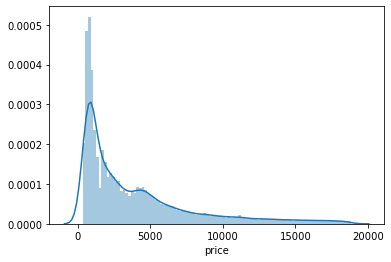

In [10]:
price = diamonds_train['price']
sns.distplot(price, bins=100)

In [11]:
#As our model wouldn't understand non-numerical data, we need to process it

In [14]:
diamonds_train['cut']=diamonds_train['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
diamonds_train['color']=diamonds_train['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
diamonds_train['clarity']=diamonds_train['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [15]:
diamonds_predict['cut']=diamonds_predict['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
diamonds_predict['color']=diamonds_predict['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
diamonds_predict['clarity']=diamonds_predict['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [16]:
diamonds_train.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.170771,0.291289,0.323969,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570
cut,0.170771,1.000000,0.042109,0.165726,-0.086327,0.495901,0.117882,0.175139,0.158237,0.155492
color,0.291289,0.042109,1.000000,-0.018561,0.051291,0.024521,0.175732,0.270498,0.263678,0.273438
clarity,0.323969,0.165726,-0.018561,1.000000,0.050257,0.141708,0.151757,0.346674,0.334968,0.346132
depth,0.026528,-0.086327,0.051291,0.050257,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655
table,0.183392,0.495901,0.024521,0.141708,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189
price,0.921935,0.117882,0.175732,0.151757,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500
x,0.975688,0.175139,0.270498,0.346674,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876
y,0.951667,0.158237,0.263678,0.334968,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828
z,0.967570,0.155492,0.273438,0.346132,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000


In [17]:
diamonds_train.shape

(40455, 10)

In [18]:
diamonds_predict.shape

(13485, 10)

In [19]:
diamonds_train['cut/wt'] = diamonds_train['cut']/diamonds_train['carat']
diamonds_train['color/wt'] = diamonds_train['color']/diamonds_train['carat']
diamonds_train['clarity/wt'] = diamonds_train['clarity']/diamonds_train['carat']
#diamonds_train = diamonds_train.drop(['cut','color','clarity','depth'], axis=1)

In [20]:
diamonds_predict['cut/wt'] = diamonds_predict['cut']/diamonds_predict['carat']
diamonds_predict['color/wt'] = diamonds_predict['color']/diamonds_predict['carat']
diamonds_predict['clarity/wt'] = diamonds_predict['clarity']/diamonds_predict['carat']
#diamonds_predict = diamonds_predict.drop(['cut','color','clarity','depth'], axis=1)

In [21]:
diamonds_train.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut/wt,color/wt,clarity/wt
carat,1.000000,0.170771,0.291289,0.323969,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570,-0.473497,-0.535200,-0.602973
cut,0.170771,1.000000,0.042109,0.165726,-0.086327,0.495901,0.117882,0.175139,0.158237,0.155492,0.631586,-0.094511,-0.029634
color,0.291289,0.042109,1.000000,-0.018561,0.051291,0.024521,0.175732,0.270498,0.263678,0.273438,-0.120171,0.507785,-0.232749
clarity,0.323969,0.165726,-0.018561,1.000000,0.050257,0.141708,0.151757,0.346674,0.334968,0.346132,-0.118652,-0.316765,0.388475
depth,0.026528,-0.086327,0.051291,0.050257,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655,-0.088391,0.015924,0.012832
table,0.183392,0.495901,0.024521,0.141708,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189,0.267673,-0.138541,-0.082125
price,0.921935,0.117882,0.175732,0.151757,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500,-0.424933,-0.498303,-0.588392
x,0.975688,0.175139,0.270498,0.346674,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876,-0.514395,-0.590974,-0.639988
y,0.951667,0.158237,0.263678,0.334968,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828,-0.509668,-0.576165,-0.626525
z,0.967570,0.155492,0.273438,0.346132,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000,-0.523020,-0.583488,-0.634010


## 3. Splitting dataset with train, test, split

In [22]:
X = diamonds_train[['carat', 'cut', 'clarity']]
Y = diamonds_train['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
#X_train, X_test, y_train, y_test = train_test_split(data, data[target], test_size = 0.2, random_state = 1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

## 4. Trying new models: Decision Tree Regressor and Gradient Boosting Regressor 

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)

print("mae: %f" %(mae))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))"""

In [24]:
scaller = StandardScaler()
X = diamonds_train[['carat', 'cut', 'clarity']]
Y = diamonds_train['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [25]:
model = GradientBoostingRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

## 5. Analysing overfitting and RMSE score

In [ ]:
#print("mae: %f" %(mae))
Rsquare=model.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred, squared=False))
print("rmse: %f" %(rmse))

## 6. Submitting model

In [ ]:
test_submit = pd.DataFrame(y_pred)
#test_submit.rename(columns={0: 'price'}, inplace=True)
#test_submit.index.names = ['id']
test_submit.to_csv("/home/sandra/Downloads/test_gradient_boosting.csv")